In [3]:
from pandas import read_excel, concat
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import os

In [6]:
e4a_dpath = "../../data/e4a_data/2022 05 01 E4A model data equations charts.xlsx"
df = read_excel(e4a_dpath,1)

In [12]:
colname = df.columns[0]
[cn for cn in df[colname] if "pop" in cn.lower()]

['"Population below 15 k$/p/y Mp"',
 '"Population growth rate 1/y"',
 'Population Mp',
 '"Urban land per population ha/p"',
 'Working age population Mp']

In [13]:
[cn for cn in df[colname] if "time" in cn.lower()]

['Construction time PIS y',
 'Construction time PUS y',
 'Demand adjustment time y',
 'FINAL TIME',
 'Finance sector response time y',
 '"Fossil capacity up-time kh/y"',
 'Fossil el cap construction time y',
 'Inflation expectation formation time y',
 'INITIAL TIME',
 'Investment planning time y',
 '"Nuclear capacity up-time kh/y"',
 'Inflation perception time CB y',
 'Inventory coverage perception time y',
 '"Persons per full-time job p/ftj"',
 '"Persons per full-time job in 1980 p/ftj"',
 '"Renewable capacity up-time kh/y"',
 'Renewable el construction time y',
 'Sales averaging time y',
 'Sampling time y',
 'Signal rate adjustment time y',
 'Time for people to prepare for paid work y',
 'TIME STEP',
 'Time to adapt to higher income y',
 'Time to adjust budget y',
 'Time to adjust hours worked y',
 'Time to adjust owner consumption y',
 'Time to adjust shifts y',
 'Time to adjust worker consumption y',
 'Time to change reform delay y',
 'Time to change tooling y',
 '"Time to enter/le

In [41]:
ts_data = df[df[colname]=="Population Mp"]*1_000_000
ts_data_wa = df[df[colname]=="Working age population Mp"]*1_000_000

In [19]:
years = ts_data.columns[1:]

In [42]:
pop = ts_data.iloc[0]
wa = ts_data_wa.iloc[0]

In [36]:
colname

'E4A global 220501 from Jorgen Randers - data export to XLS '

In [34]:

#plt.plot(years, pop)
pop_df = pop.reset_index().iloc[1:]
pop_df.columns = ["Year","Population"]

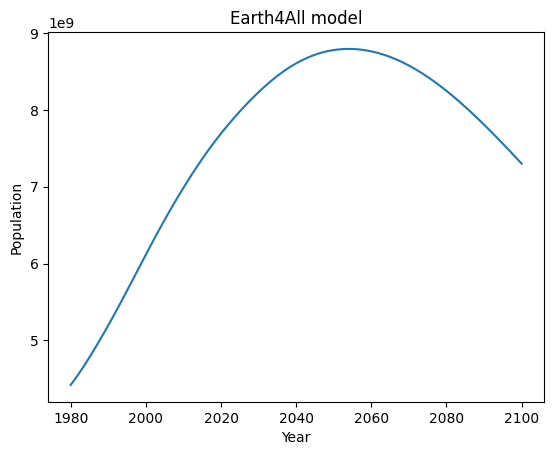

In [38]:
sns.lineplot(data=pop_df,
            x="Year",
            y="Population")
plt.title("Earth4All model")
plt.show()

In [39]:
pop_df.to_csv("../../data/prepared_data/e4a.csv")

In [43]:
wa_df = wa.reset_index().iloc[1:]
wa_df.columns = ["Year","WorkingAgePopulation"]

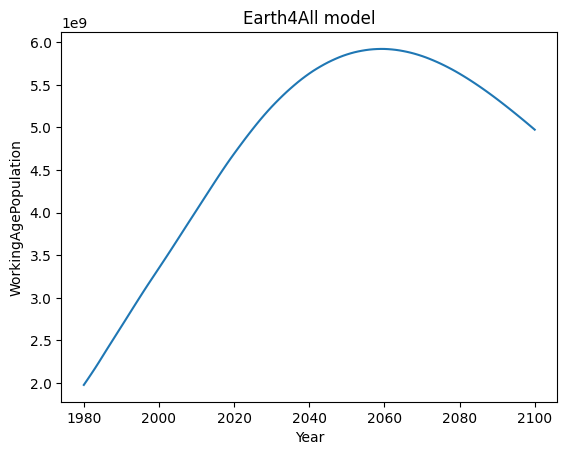

In [45]:
sns.lineplot(data=wa_df,
            x="Year",
            y="WorkingAgePopulation")
plt.title("Earth4All model")
plt.show()

Text(0.5, 1.0, 'Comparison of E4A total population vs working age')

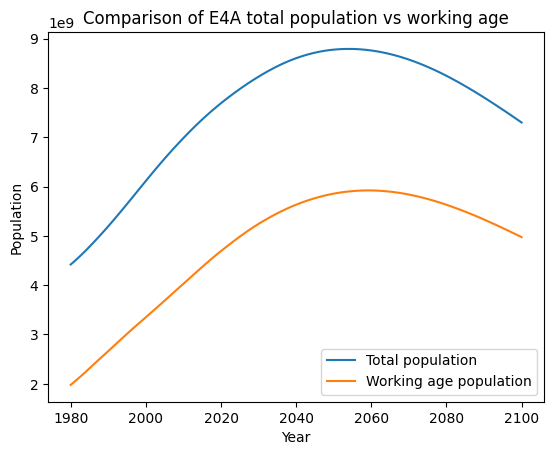

In [60]:
fig, ax = plt.subplots()
line1, = ax.plot(pop_df.Year, pop_df.Population)
line1.set_label("Total population")
line2, = ax.plot(pop_df.Year, wa_df.WorkingAgePopulation)
line2.set_label("Working age population")
plt.xlabel("Year")
plt.ylabel("Population")
ax.legend()
plt.title("Comparison of E4A total population vs working age")

In [62]:
pop_df["DependencyRatio"] = (pop_df.Population/wa_df.WorkingAgePopulation - 1)

In [63]:
fig, ax = plt.subplots()
line1, = ax.plot(pop_df.Year, pop_df.Population)
line1.set_label("Total population")
line2, = ax.plot(pop_df.Year, wa_df.WorkingAgePopulation)
line2.set_label("Working age population")
plt.xlabel("Year")
plt.ylabel("Population")
ax.legend()
plt.title("Comparison of E4A total population vs working age")

,Year,Population,DependencyRatio
1,1980,4420000000.0,1.235549
2,1981,4486124145.774676,1.197255
3,1982,4555361669.830934,1.161663
4,1983,4627691896.481016,1.128527
5,1984,4702930437.462069,1.096654
...,...,...,...
117,2096,7508270472.099951,0.465868
118,2097,7456727277.272234,0.466189
119,2098,7404809644.889907,0.466582
120,2099,7352526428.5156,0.467039
